### Importing the main libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing phase

### Exploration phase

In [2]:
data = pd.read_csv("Absenteeism_data.csv")

In [3]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [4]:
# Making a copy of the dataset 
df = data.copy()

In [5]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [7]:
# Dropping the ID column because it has no direct effect on our analysis
df = df.drop(['ID'],1)

C:\Users\Tariq\AppData\Local\Temp\ipykernel_4616\4146821861.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['ID'],1)


In [8]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Reason for Absence Column

In [9]:
# Explore Reason for Absence for more information
df["Reason for Absence"]

0      26
1       0
2      23
3       7
4      23
       ..
695    10
696     6
697    10
698    23
699    28
Name: Reason for Absence, Length: 700, dtype: int64

In [10]:
df["Reason for Absence"].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [11]:
df["Reason for Absence"].max()

28

In [12]:
df["Reason for Absence"].min()

0

In [13]:
len(df["Reason for Absence"].unique())
# Seems like there's a missing number

28

In [14]:
# Finding the Missing number programmatically
Missing = []
rangenum = range(0, 29)  # Full range of expected numbers
S = sorted(df["Reason for Absence"].unique())  # Sorted unique values in the column

for i in rangenum:  # Loop through the full range
    if i not in S:  # Check if the number is not in the unique values
        Missing.append(i)

print("Missing number(s):", Missing)


Missing number(s): [20]


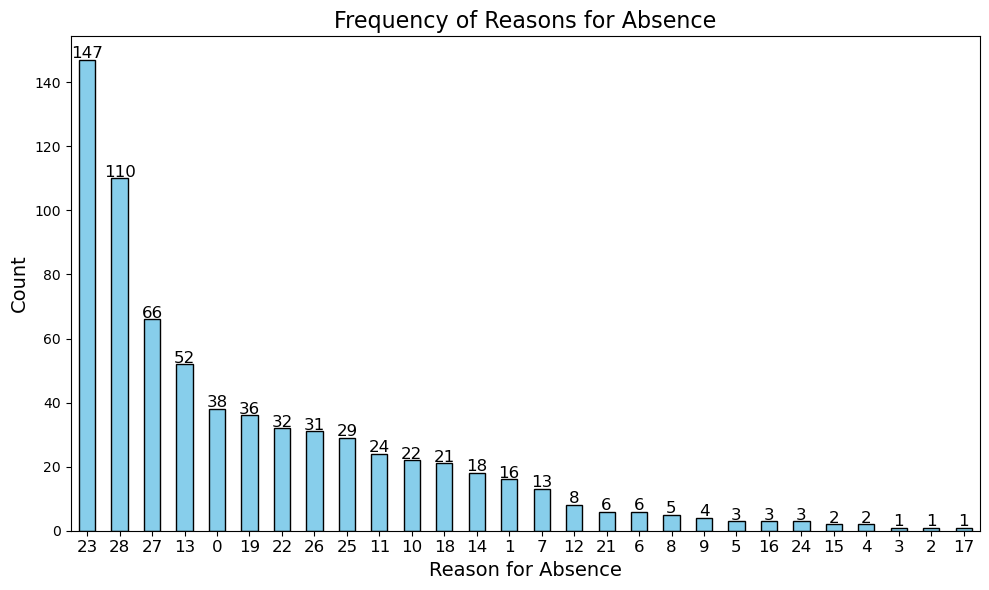

In [15]:
# Count the occurrences of each unique value
reason_counts = df["Reason for Absence"].value_counts()

# Plot the column chart
plt.figure(figsize=(10, 6))
ax = reason_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Add numbers above the bars
for index, value in enumerate(reason_counts):
    plt.text(index, value + 0.5, str(value), ha="center", fontsize=12, color="black")

# Add labels and title
plt.title("Frequency of Reasons for Absence", fontsize=16)
plt.xlabel("Reason for Absence", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### Splitting the Reason for Absence column to dummy varaibles

In [16]:
# Using dummy varaibles
column_names = pd.get_dummies(df["Reason for Absence"])

In [17]:
column_names

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
# Removing column 1 to try to avoid Multicollinearity
column_names = pd.get_dummies(df["Reason for Absence"], drop_first = True)

In [19]:
column_names.head(5)

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# Grouping each couple of categories under one name to make our life easier in the analyzing phase
# After reviewing the data the right call was to split them into 4 groups
reason_type_1 = column_names.loc[:,1:14].max(axis=1)
reason_type_2 = column_names.loc[:,15:17].max(axis=1)
reason_type_3 = column_names.loc[:,18:21].max(axis=1)
reason_type_4 = column_names.loc[:,22:].max(axis=1)

In [21]:
df = pd.concat([df,reason_type_1,reason_type_2,reason_type_3,reason_type_4],axis = 1)

In [22]:
df.head(5)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [23]:
# Again avoiding Multicollinearity
df = df.drop(["Reason for Absence"],axis = 1)

In [24]:
# Changing the column names to have meaningful names
# We didn't use " " for the column names because it's considered as int values not obj
df.rename(columns={0: "Reason_1", 1: "Reason_2", 2: "Reason_3", 3: "Reason_4"}, inplace=True)

In [25]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


In [26]:
# Reordering the column names
df.columns
column_names_reorder =['Reason_1', 'Reason_2', 'Reason_3',
       'Reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']

In [27]:
df = df[column_names_reorder]

### Date column

In [28]:
# Working with the Date column
df["Date"].info()
# Seems like it's an object

<class 'pandas.core.series.Series'>
RangeIndex: 700 entries, 0 to 699
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
700 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [29]:
# Checking with another way
type(df["Date"][0])
# Yeah it's a string, We need it in Date format

str

In [30]:
# Converting the Date column to date 
df['Date'] = pd.to_datetime(df["Date"],format ="%d/%m/%Y")

In [31]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 700 entries, 0 to 699
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
700 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.6 KB


In [32]:
# Working on the Months
df["Date"][0].month

7

In [33]:
# Creating a list to add it later to the main df 
month_list = []
month_list = df["Date"].apply(lambda x: x.month).tolist()
df["Month"] = month_list

In [34]:
# Working on the Days
# NOTE: DAYS START AT MONDAY = 0 | TUESDAY = 1 | Wednesday = 2 
weekday_list = []
weekday_list = df["Date"].apply(lambda x: x.weekday()).tolist()
df["Day of the week"] = weekday_list

In [35]:
df

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of the week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,3
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,3


In [36]:
# Working with the education column
df["Education"].unique()

array([1, 3, 2, 4], dtype=int64)

### Education Column are Splitted to the following structure:
##### 1- High school
##### 2- Graduate
##### 3- Post graduate
##### 4- Master or Doctor

In [37]:
df["Education"].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [38]:
# Okay let's split them into 2 groups 1 before garduation and one after 
df["Education"] = df ["Education"].map({1:0,2:1,3:1,4:1})

In [39]:
df["Education"].value_counts()

0    583
1    117
Name: Education, dtype: int64

In [40]:
# Final checkpoint
data_preprocessed = df.copy()
data_preprocessed.head(5)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of the week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3


Now that we are done with our Preprocessing phase *Not quite :D we have more* we are moving on to the Maching learning part

## Machine Learning phase

### Adding the target column

In [41]:
# Checking for the median
data_preprocessed["Absenteeism Time in Hours"].median()
# Hmmm I want to see the unique values we have

3.0

In [42]:
# Unique values 
sorted(data_preprocessed["Absenteeism Time in Hours"].unique())
# We have a huge range, I want to check the highest one

[0, 1, 2, 3, 4, 5, 7, 8, 16, 24, 32, 40, 48, 56, 64, 80, 104, 112, 120]

In [43]:
# Checking the highest value 
data_preprocessed[data_preprocessed["Absenteeism Time in Hours"] == 120]
# is it bad data? You can't be away more than 24 xD we only have 24 hours per day xD
# We can have a graph to see how many times more that 24 occurs in our data

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of the week
323,1,0,0,0,2016-11-14,155,12,34,284.031,25,0,2,0,120,11,0
420,1,0,0,0,2017-04-19,118,13,50,239.409,31,0,1,0,120,4,2


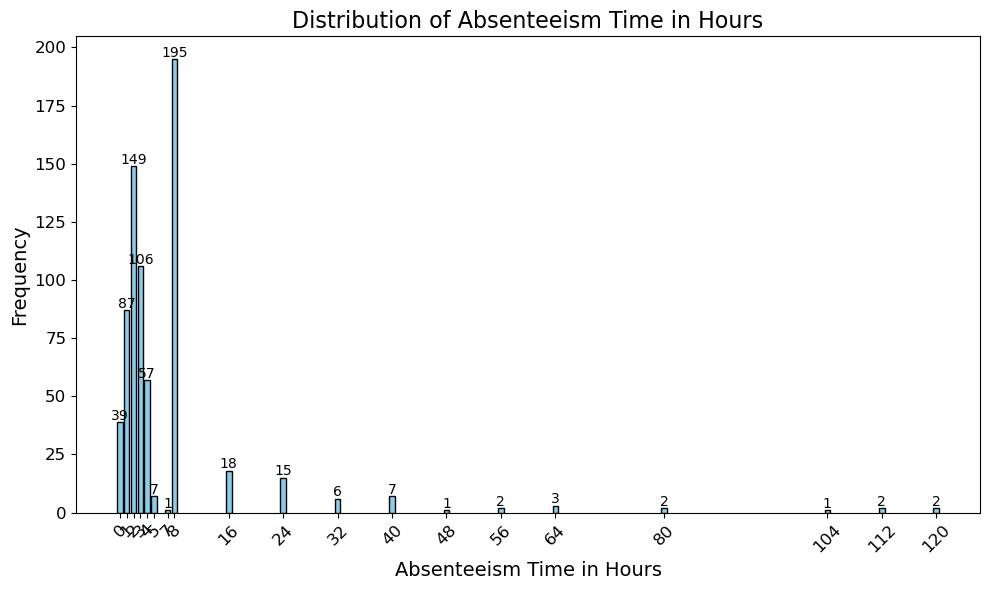

In [44]:
# Count occurrences of each unique value in "Absenteeism Time in Hours"
value_counts = data_preprocessed["Absenteeism Time in Hours"].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Absenteeism Time in Hours", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Absenteeism Time in Hours", fontsize=16)
plt.xticks(value_counts.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add the count on top of each bar
for i, value in enumerate(value_counts.values):
    plt.text(value_counts.index[i], value + 1, str(value), ha='center', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()
# That's interseting more than 24? hmmm

In [45]:
# Filter the column for values less than or equal to 24
filtered_data = data_preprocessed[data_preprocessed["Absenteeism Time in Hours"] <= 24]

# Calculate the median
median_value = filtered_data["Absenteeism Time in Hours"].median()

print(f"The median value (excluding numbers > 24) is: {median_value}")

# Let's check if the median will change
# Wow we got the same Median, No need to exclude them

The median value (excluding numbers > 24) is: 3.0


In [46]:
# Let's add the target column so we can depend on during our ML code
target = np.where(data_preprocessed["Absenteeism Time in Hours"] > 
                  data_preprocessed["Absenteeism Time in Hours"].median(), 1 , 0)

In [47]:
data_preprocessed["Excessive Absenteeism"] = target

In [48]:
#drop the data_preprocessed["Absenteeism Time in Hours"]
data_preprocessed.drop("Absenteeism Time in Hours", axis=1, inplace=True)

In [49]:
# Calculate the value counts and normalize to get percentages
data_preprocessed["Excessive Absenteeism"].value_counts(normalize=True) * 100
# Seems good for our analyze, let's go forward

0    54.428571
1    45.571429
Name: Excessive Absenteeism, dtype: float64

### Slicing the dataset

In [50]:
# I think we need to drop the Date column aswell because it's making a problem during the Standardizition phase
data_preprocessed.drop("Date", axis = 1, inplace = True)

In [51]:
# Excluding the Excessive Absenteeism
unscaled_inputs = data_preprocessed.iloc[:,:-1]

In [52]:
unscaled_inputs.head(5)

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day of the week
0,0,0,0,1,289,36,33,239.554,30,0,2,1,7,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,7,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,7,2
3,1,0,0,0,279,5,39,239.554,24,0,2,0,7,3
4,0,0,0,1,289,36,33,239.554,30,0,2,1,7,3


### Standardize the dataset | Split the dataset

In [53]:
unscaled_inputs.columns

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Month', 'Day of the week'],
      dtype='object')

In [54]:
from sklearn.preprocessing import StandardScaler

# Define the variables to exclude
variables_to_exclude = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

# Identify the variables to standardize
variables_to_standardize = [col for col in unscaled_inputs.columns if col not in variables_to_exclude]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize only the selected variables
unscaled_inputs[variables_to_standardize] = scaler.fit_transform(unscaled_inputs[variables_to_standardize])

# Rename the standardized dataset
scaled_inputs = unscaled_inputs

# Output the standardized dataset
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day of the week
0,0,0,0,1,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487,0.182726,-0.683704
1,0,0,0,0,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690,0.182726,-0.683704
2,0,0,0,1,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690,0.182726,-0.007725
3,1,0,0,0,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690,0.182726,0.668253
4,0,0,0,1,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487,0.182726,0.668253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,1,0.880469,-0.589690,-0.388293,-0.007725
696,1,0,0,0,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,0,-0.019280,1.126663,-0.388293,-0.007725
697,1,0,0,0,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,1,-0.919030,-0.589690,-0.388293,0.668253
698,0,0,0,1,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,1,-0.919030,-0.589690,-0.388293,0.668253


In [55]:
from sklearn.model_selection import train_test_split
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, target, train_size=0.8,random_state=20)

In [56]:
print(f"Train data X shape = {X_train.shape}, Train target data (y) shape = {y_train.shape}")

Train data X shape = (560, 14), Train target data (y) shape = (560,)


In [57]:
print(f"Test data (X) shape = {X_test.shape}, Test target data (y) shape = {y_test.shape}")

Test data (X) shape = (140, 14), Test target data (y) shape = (140,)


### Building the model

#### Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [59]:
reg = LogisticRegression()

In [60]:
reg.fit(X_train,y_train)

LogisticRegression()

In [61]:
reg.score(X_train,y_train)

0.775

In [62]:
model_outputs = reg.predict(X_train)

In [63]:
# Checking for accuracy
np.sum(model_outputs == y_train) / model_outputs.shape[0]

0.775

In [64]:
# Checking for accuracy using sklearn
accuracy = metrics.accuracy_score(y_train, model_outputs)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [65]:
reg.coef_[0]

array([ 2.80096498e+00,  9.34857518e-01,  3.09561645e+00,  8.56587468e-01,
        6.12732578e-01, -7.79685996e-03, -1.65922708e-01, -1.47005123e-04,
        2.71811477e-01, -2.05738037e-01,  3.61989880e-01, -2.85510745e-01,
        1.66248119e-01, -8.43703301e-02])

In [66]:
# Storing the column names because we are going to need it 
feature_names = scaled_inputs.columns
feature_names

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Month', 'Day of the week'],
      dtype='object')

In [67]:
# Checking for the len of the Coefficient 
len(reg.coef_[0]) ==  len(feature_names)

True

In [68]:
# This is our interception
reg.intercept_

array([-1.6561092])

In [69]:
# We are going to need them to use them in Tableau
summary_table = pd.DataFrame(columns = ['Feature names'], data = feature_names)

In [70]:
summary_table

,Feature names
0,Reason_1
1,Reason_2
2,Reason_3
3,Reason_4
4,Transportation Expense
5,Distance to Work
6,Age
7,Daily Work Load Average
8,Body Mass Index
9,Education


In [71]:
# Adding the cofe to the table to use later in farther analysis and predications
summary_table["Coefficient"] = np.transpose(reg.coef_)
summary_table

,Feature names,Coefficient
0,Reason_1,2.800965
1,Reason_2,0.934858
2,Reason_3,3.095616
3,Reason_4,0.856587
4,Transportation Expense,0.612733
5,Distance to Work,-0.007797
6,Age,-0.165923
7,Daily Work Load Average,-0.000147
8,Body Mass Index,0.271811
9,Education,-0.205738


##### Interpreting the coefficients

In [72]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficient)

In [73]:
summary_table.sort_values("Odds_ratio", ascending=False)

,Feature names,Coefficient,Odds_ratio
2,Reason_3,3.095616,22.100858
0,Reason_1,2.800965,16.460523
1,Reason_2,0.934858,2.546851
3,Reason_4,0.856587,2.355110
4,Transportation Expense,0.612733,1.845467
10,Children,0.361990,1.436184
8,Body Mass Index,0.271811,1.312340
12,Month,0.166248,1.180866
7,Daily Work Load Average,-0.000147,0.999853
5,Distance to Work,-0.007797,0.992233


##### Testing the model

In [74]:
# assess the test accuracy of the model
reg.score(X_test,y_test)

0.7428571428571429

In [75]:
# find the predicted probabilities of each class
# the first column shows the probability of a particular observation to be 0, while the second one - to be 1
predicted_proba = reg.predict_proba(X_test)

# let's check that out
predicted_proba

array([[0.73838887, 0.26161113],
       [0.60860095, 0.39139905],
       [0.40910176, 0.59089824],
       [0.80489361, 0.19510639],
       [0.0732329 , 0.9267671 ],
       [0.31965834, 0.68034166],
       [0.31302205, 0.68697795],
       [0.13341719, 0.86658281],
       [0.79712508, 0.20287492],
       [0.75274419, 0.24725581],
       [0.48222467, 0.51777533],
       [0.1964133 , 0.8035867 ],
       [0.07857533, 0.92142467],
       [0.70622367, 0.29377633],
       [0.30708515, 0.69291485],
       [0.57055326, 0.42944674],
       [0.54143955, 0.45856045],
       [0.57205946, 0.42794054],
       [0.38194051, 0.61805949],
       [0.04857923, 0.95142077],
       [0.6977753 , 0.3022247 ],
       [0.79578125, 0.20421875],
       [0.3949288 , 0.6050712 ],
       [0.42248618, 0.57751382],
       [0.26634773, 0.73365227],
       [0.75608758, 0.24391242],
       [0.51088279, 0.48911721],
       [0.86807166, 0.13192834],
       [0.20221381, 0.79778619],
       [0.78635626, 0.21364374],
       [0.

In [76]:
predicted_proba.shape

(140, 2)

In [77]:
# select ONLY the probabilities referring to 1s
predicted_proba[:,1] 

array([0.26161113, 0.39139905, 0.59089824, 0.19510639, 0.9267671 ,
       0.68034166, 0.68697795, 0.86658281, 0.20287492, 0.24725581,
       0.51777533, 0.8035867 , 0.92142467, 0.29377633, 0.69291485,
       0.42944674, 0.45856045, 0.42794054, 0.61805949, 0.95142077,
       0.3022247 , 0.20421875, 0.6050712 , 0.57751382, 0.73365227,
       0.24391242, 0.48911721, 0.13192834, 0.79778619, 0.21364374,
       0.37354833, 0.68671888, 0.68840326, 0.54141425, 0.20421875,
       0.50817528, 0.21068631, 0.74426986, 0.43687316, 0.59038329,
       0.22501874, 0.43474443, 0.21701898, 0.39313905, 0.8143125 ,
       0.57069356, 0.69250264, 0.27274934, 0.20204647, 0.18057868,
       0.59237372, 0.34581089, 0.66771423, 0.28542145, 0.84957431,
       0.47045028, 0.88919506, 0.25614793, 0.31973858, 0.31768456,
       0.72178349, 0.6571659 , 0.31198576, 0.78711296, 0.19846624,
       0.26534346, 0.08192232, 0.23025544, 0.7270172 , 0.33464876,
       0.21066287, 0.29448939, 0.90909748, 0.43911695, 0.61982

### GridSearchCV model comparison

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import time

# Define models and hyperparameters
param_grid = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 0.3],
            'max_depth': [3, 5, 7]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# Store results
results = []

# Iterate over models and perform GridSearchCV
for model_name, config in param_grid.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Start timer
    start_time = time.time()
    
    # Run GridSearchCV
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    # End timer
    end_time = time.time()
    training_time = end_time - start_time  # Training time in seconds
    
    # Get best model and scores
    best_model = grid.best_estimator_
    train_acc = grid.best_score_
    test_acc = best_model.score(X_test, y_test)
    
    print(f"{model_name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}, Training Time: {training_time:.2f} seconds")
    # If Logistic Regression is the best model, store it
    if model_name == 'LogisticRegression':
        best_logreg_model = best_model
    # Append results
    results.append({'Model': model_name, 
                    'Train Accuracy': train_acc, 
                    'Test Accuracy': test_acc, 
                    'Training Time': training_time})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

Running GridSearchCV for LogisticRegression...
LogisticRegression - Train Accuracy: 0.7607, Test Accuracy: 0.7357, Training Time: 0.21 seconds
Running GridSearchCV for RandomForest...
RandomForest - Train Accuracy: 0.7518, Test Accuracy: 0.7357, Training Time: 5.20 seconds
Running GridSearchCV for XGBoost...


D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26

D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26

D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26

D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26

D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\C\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26

XGBoost - Train Accuracy: 0.7625, Test Accuracy: 0.7143, Training Time: 8.03 seconds
Running GridSearchCV for SVM...
SVM - Train Accuracy: 0.7571, Test Accuracy: 0.7357, Training Time: 1.01 seconds


In [79]:
predicted_proba = best_logreg_model.predict_proba(X_test)
predicted_proba[:,1]

array([0.25854645, 0.41246728, 0.64217565, 0.18512934, 0.94186926,
       0.69499069, 0.70547476, 0.9189694 , 0.19361738, 0.23782214,
       0.53962876, 0.85481332, 0.95422954, 0.2764678 , 0.76309496,
       0.4586896 , 0.47242533, 0.44410579, 0.61917181, 0.97536816,
       0.30295388, 0.19298266, 0.6246458 , 0.60033351, 0.81344352,
       0.2380667 , 0.53689901, 0.1089546 , 0.8617531 , 0.20108691,
       0.38654594, 0.70702185, 0.70338092, 0.56623059, 0.19298266,
       0.54856847, 0.20300842, 0.81939626, 0.45062848, 0.6176631 ,
       0.2081883 , 0.40398996, 0.21126886, 0.08269284, 0.84399595,
       0.6588279 , 0.72106931, 0.26767038, 0.19939737, 0.16792265,
       0.57770135, 0.07104557, 0.6811344 , 0.28635907, 0.87626929,
       0.49016419, 0.93207796, 0.24839231, 0.06839442, 0.06878922,
       0.73667932, 0.67117427, 0.31457594, 0.85757161, 0.18167921,
       0.25798205, 0.01035492, 0.21936679, 0.80879044, 0.32196678,
       0.20232597, 0.0593448 , 0.93664887, 0.46641315, 0.66363

In [80]:
results_df

,Model,Train Accuracy,Test Accuracy,Training Time
0,LogisticRegression,0.760714,0.735714,0.212767
1,RandomForest,0.751786,0.735714,5.200447
2,XGBoost,0.762500,0.714286,8.026800
3,SVM,0.757143,0.735714,1.011173


### Plotting the Models Accuracy and Time

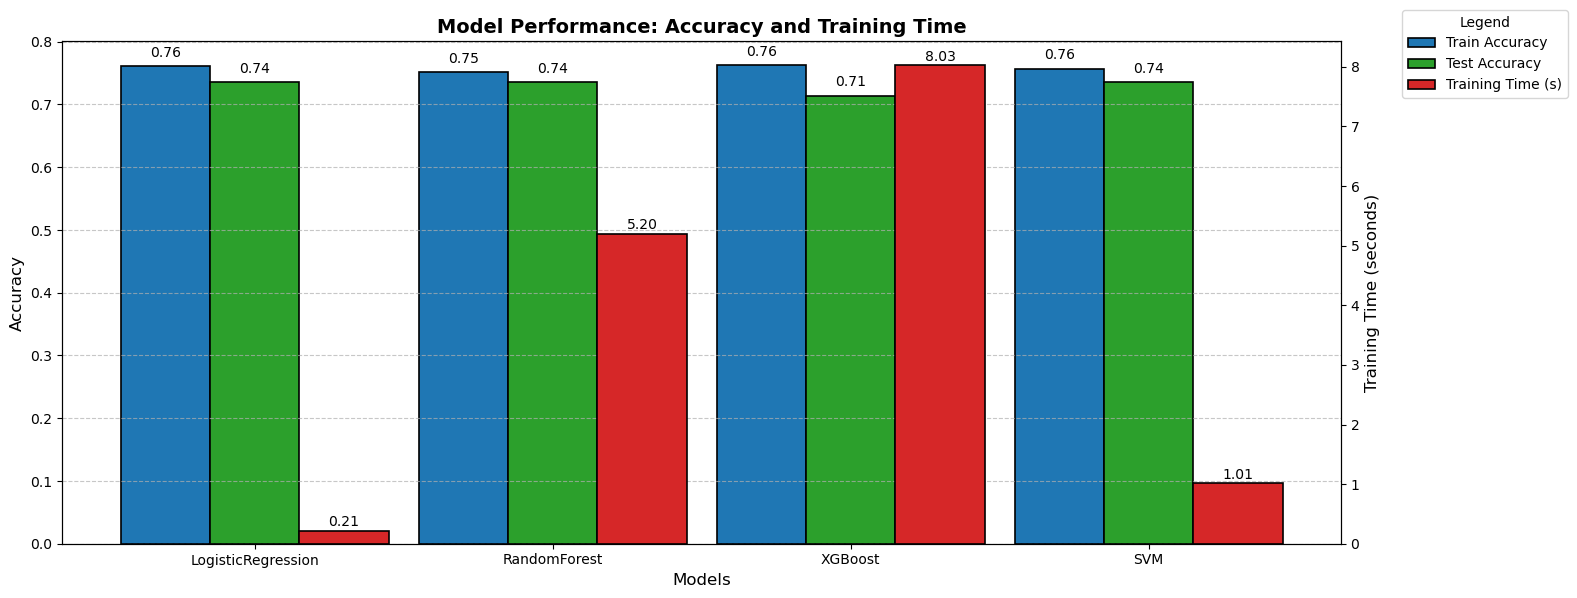

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 6), dpi=100)  # Increased width and improved resolution
x = np.arange(len(results_df))  # Model indices
width = 0.3

# Colors and styling
train_color = '#1f77b4'  # Blue for Train Accuracy
test_color = '#2ca02c'   # Green for Test Accuracy
time_color = '#d62728'   # Red for Training Time

# Bars for Train and Test Accuracy
train_bars = ax1.bar(x - width, results_df['Train Accuracy'], width, label='Train Accuracy', color=train_color, edgecolor='black', linewidth=1.2)
test_bars = ax1.bar(x, results_df['Test Accuracy'], width, label='Test Accuracy', color=test_color, edgecolor='black', linewidth=1.2)

# Secondary y-axis for Training Time
ax2 = ax1.twinx()
time_bars = ax2.bar(x + width, results_df['Training Time'], width, label='Training Time (s)', color=time_color, edgecolor='black', linewidth=1.2)

# Add labels, title, and legends
ax1.set_xlabel('Models', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax2.set_ylabel('Training Time (seconds)', fontsize=12)
ax1.set_title('Model Performance: Accuracy and Training Time', fontsize=14, fontweight='bold')

ax1.set_xticks(x)
ax1.set_xticklabels(results_df['Model'], rotation=0, ha='center', fontsize=10)

# Gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Modify legend to appear on the right side and increase font size slightly
fig.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title='Legend')

# Add values on top of bars but adjusted lower
for bar in train_bars + test_bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')
for bar in time_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, height + 0.03, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Improve layout to prevent clipping
plt.tight_layout()

# Save the figure
plt.savefig('model_performance_stylish.png', bbox_inches='tight', dpi=150)

# Show the plot
plt.show()


## Saving the model

In [82]:
import joblib

# Assuming best_model contains the trained Logistic Regression model
joblib.dump(best_logreg_model, 'log_model.pkl')

print("Logistic Regression model saved as 'log_model.pkl'.")


Logistic Regression model saved as 'log_model.pkl'.
